#**Predicción de la obesidad**

##**Introducción**
En la actualidad, la obesidad y el sobrepeso son problemas de salud pública globales. Diversos factores influyen en el peso corporal de los individuos, incluidos el género, la edad, el historial familiar, y otros hábitos de vida como la alimentación y el nivel de actividad física. Este proyecto tiene como objetivo analizar cómo estas variables independientes afectan el peso corporal, identificando factores que contribuyen a la prevención de la obesidad.

La regresión lineal múltiple se utilizará para identificar las relaciones entre las variables dependientes e independientes. El peso corporal será la variable dependiente, y se analizará cómo se ve influenciado por las variables seleccionadas, como el género, la edad, la altura, los hábitos alimenticios, el nivel de actividad física, entre otros.

##**Hipótesis**
El peso corporal influye significativamente en las variables independientes seleccionadas, como el género, la edad, la altura, los hábitos alimenticios y el nivel de actividad física.

##**Marco teórico**
La regresión lineal múltiple permite modelar la relación entre una variable dependiente y dos o más variables independientes, buscando predecir el valor de la variable dependiente basándose en los valores de las variables independientes.


**Objetivo:**

La regresión lineal múltiple busca establecer una ecuación que prediga el valor de una variable dependiente (o variable de respuesta) en función de dos o más variables independientes (o predictores).

**Variables:**


*   **Variable dependiente (Y):** Es la variable que se quiere predecir o explicar.
*   **Variables independientes (X1, X2, ...):** Son las variables que se cree que influyen en la variable dependiente.


**Modelo:**

La ecuación de la regresión lineal múltiple tiene la forma: Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

*   β₀: Intercepto (valor de Y cuando todas las X son cero).
*   β₁, β₂, ... βₙ: Coeficientes de regresión (cambio en Y por cada unidad que aumenta la variable X correspondiente, manteniendo constantes las demás variables).
*   ε: Término de error (diferencia entre el valor real y el valor predicho).


**Interpretación de los coeficientes:**

Los coeficientes de regresión indican la magnitud y dirección de la relación entre cada variable independiente y la variable dependiente.

**Ejemplos de aplicación:**

*   Predecir el rendimiento de un cultivo en función de la cantidad de lluvia, temperatura y fertilizantes.
*   Establecer la relación entre la dosis de un medicamento y la presión arterial de un paciente.
*   Analizar cómo la dieta y el ejercicio influyen en las enfermedades cardíacas.


**Consideraciones:**

*   La regresión lineal múltiple asume una relación lineal entre las variables.
*   Es importante verificar que las variables independientes no estén altamente correlacionadas entre sí (multicolinealidad).
*   La regresión lineal múltiple no prueba la causalidad, solo establece una relación.


**Alternativas:**

*   Regresión polinomial: Cuando la relación entre las variables no es lineal.
*   Regresión logística: Cuando la variable dependiente es dicotómica (ej: sí/no, vivo/muerto).

##**Metodología**
Tenemos un conjunto de datos con 17 características, como edad, altura, género, actividad física y alimentación. El objetivo es predecir el peso de las personas en función de estos factores.

1. Convertir las variables categóricas a variables númericas, realizando ANOVA y Tukey.
2. Realizar histogramas para ver la distribución de las variables numéricas.
3. Calcular el mapa de calor o matriz de correlación para ver la relación entre las variables.
4. Graficar los residuales para verificar los supestos.
5. Calcular el coeficiente de determinación para ver que tan bien el modelo explica los datos.
6. Realizar la prueba de Breusch-Pagan.
7. Realizar ANOVA

##**Resultados**

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Elizabeth341/Estadistica/refs/heads/main/Obesity%20prediction.csv")
df.dropna(inplace = True)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(Gender)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,3.783016e+04,37830.158382,56.601025,7.855124e-14
Residual,2109.0,1.409582e+06,668.365253,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
Female   Male   8.4671   0.0  6.26 10.6742   True
-------------------------------------------------


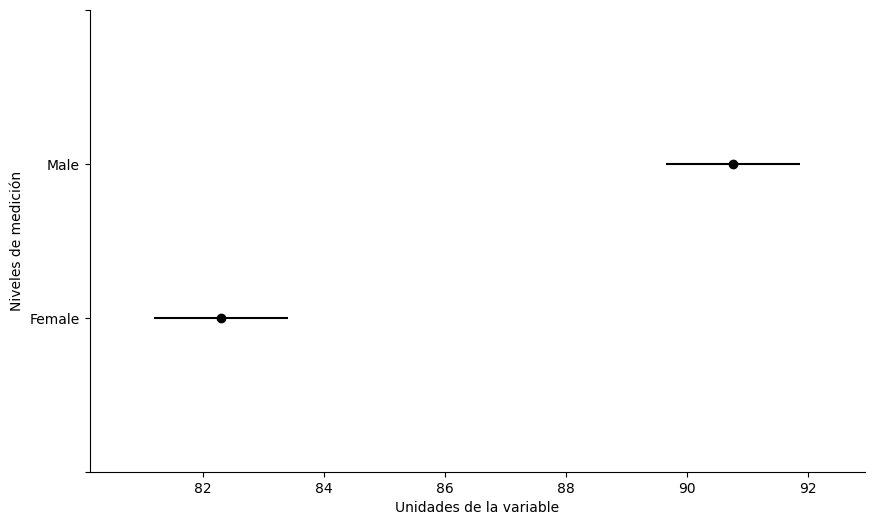

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['Gender'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Female' : 1, 'Male' : 2}
df['Gender'] = df['Gender'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


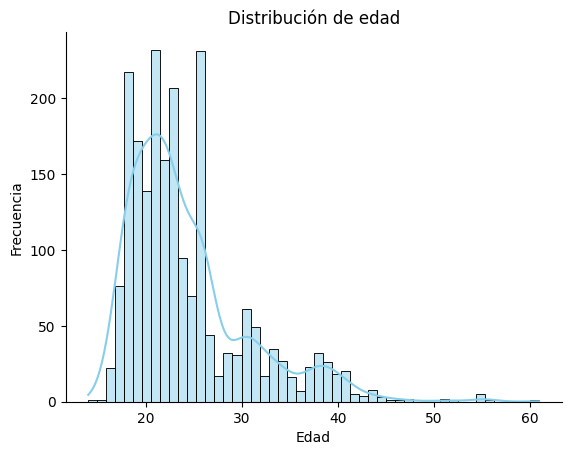

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde = True, color = 'skyblue')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edad')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

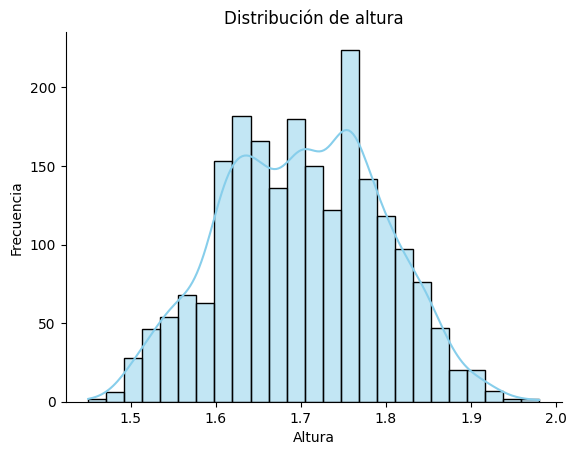

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Height'], kde = True, color = 'skyblue')

plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.title('Distribución de altura')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

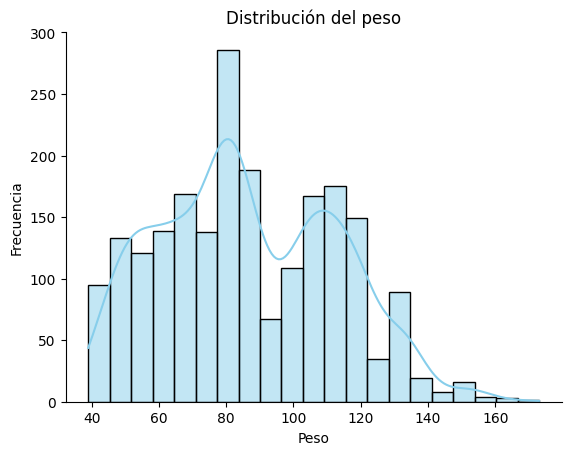

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Weight'], kde = True, color = 'skyblue')

plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución del peso')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(family_history)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(family_history),1.0,3.572655e+05,357265.526279,691.166447,5.326129e-132
Residual,2109.0,1.090147e+06,516.902300,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
    no    yes  33.6891   0.0 31.176 36.2021   True
--------------------------------------------------


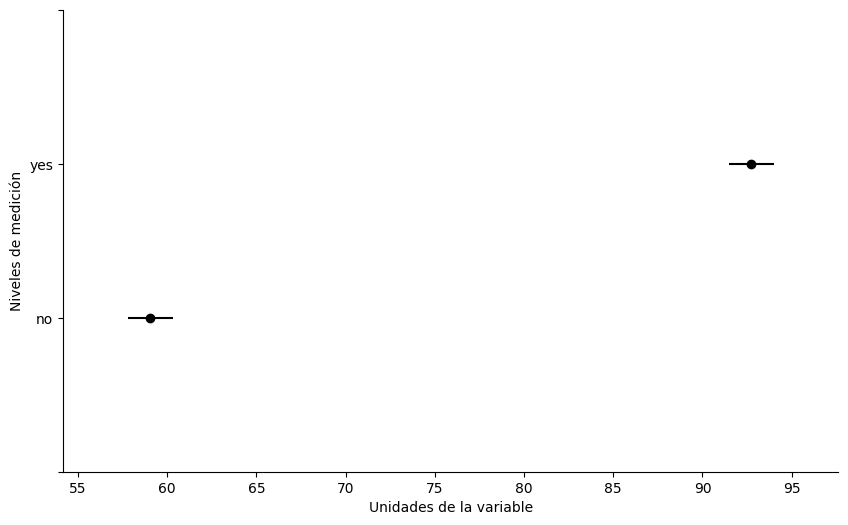

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['family_history'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'no' : 0, 'yes' : 1}
df['family_history'] = df['family_history'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(FAVC)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(FAVC),1.0,1.073221e+05,107322.099257,168.900778,3.315687e-37
Residual,2109.0,1.340090e+06,635.415068,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no    yes  22.2613   0.0 18.9021 25.6204   True
---------------------------------------------------


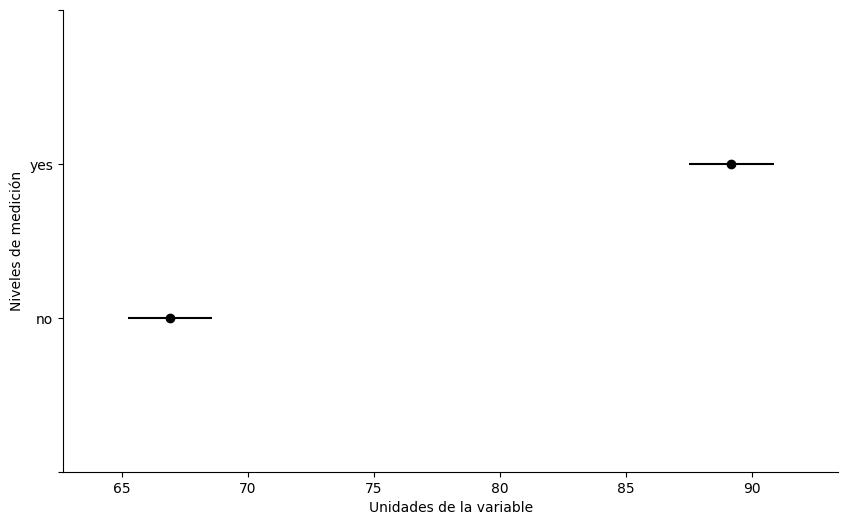

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['FAVC'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'no' : 0, 'yes' : 1}
df['FAVC'] = df['FAVC'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


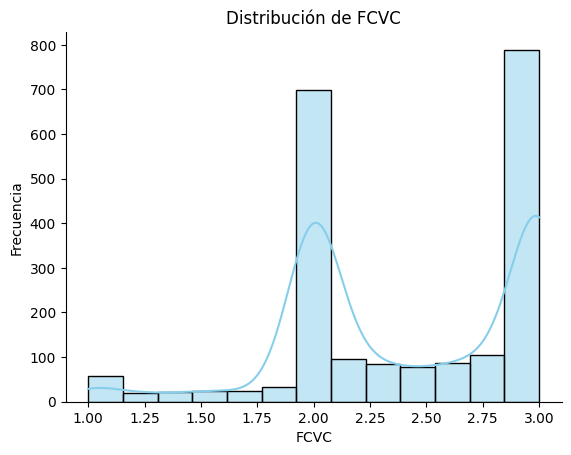

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['FCVC'], kde = True, color = 'skyblue')

plt.xlabel('FCVC')
plt.ylabel('Frecuencia')
plt.title('Distribución de FCVC')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

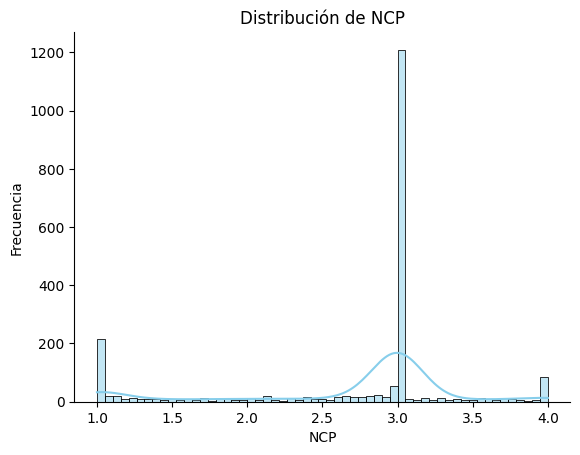

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['NCP'], kde = True, color = 'skyblue')

plt.xlabel('NCP')
plt.ylabel('Frecuencia')
plt.title('Distribución de NCP')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(CAEC)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(CAEC),3.0,2.545943e+05,84864.779705,149.905577,4.725762e-88
Residual,2107.0,1.192818e+06,566.121565,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
    Always Frequently -12.2049 0.0041 -21.4825  -2.9273   True
    Always  Sometimes  20.2698    0.0  11.7416   28.798   True
    Always         no  -2.1881 0.9659 -14.1876   9.8115  False
Frequently  Sometimes  32.4747    0.0  28.2813  36.6681   True
Frequently         no  10.0168 0.0322   0.5911  19.4425   True
 Sometimes         no -22.4579    0.0 -31.1469 -13.7688   True
--------------------------------------------------------------


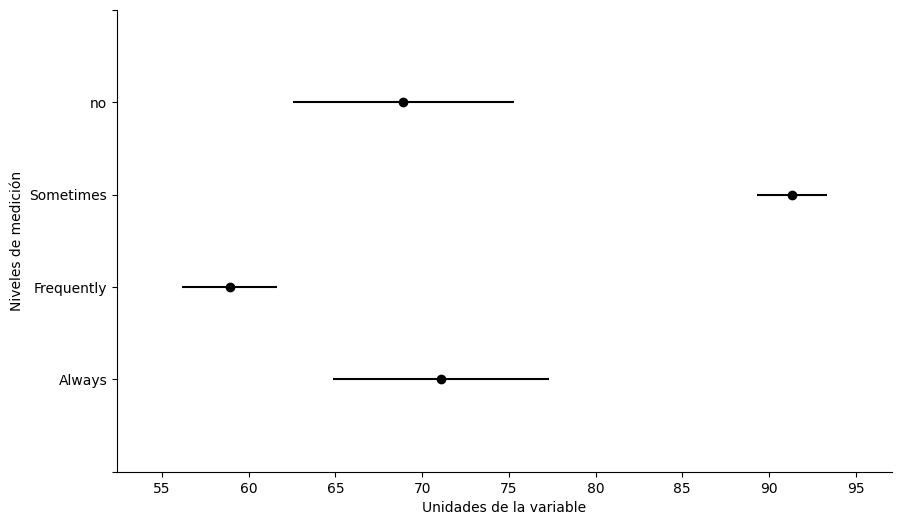

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['CAEC'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Always' : 3, 'Frequently' : 2, 'Sometimes' : 1, 'no' : 0}
df['CAEC'] = df['CAEC'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(SMOKE)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(SMOKE),1.0,9.594576e+02,959.457558,1.398937,0.237035
Residual,2109.0,1.446453e+06,685.847805,NaN,NaN


In [ ]:
df.drop(columns = ['SMOKE'], inplace = True)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


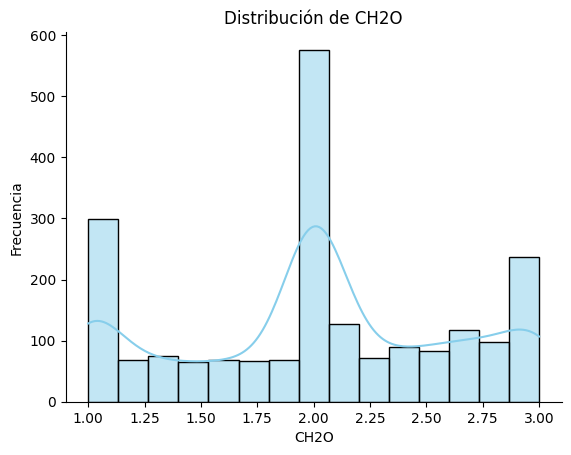

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['CH2O'], kde = True, color = 'skyblue')

plt.xlabel('CH2O')
plt.ylabel('Frecuencia')
plt.title('Distribución de CH2O')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(SCC)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(SCC),1.0,5.900546e+04,59005.463195,89.629713,7.402166e-21
Residual,2109.0,1.388407e+06,658.324805,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower   upper   reject
----------------------------------------------------
    no    yes -25.3756   0.0 -30.632 -20.1192   True
----------------------------------------------------


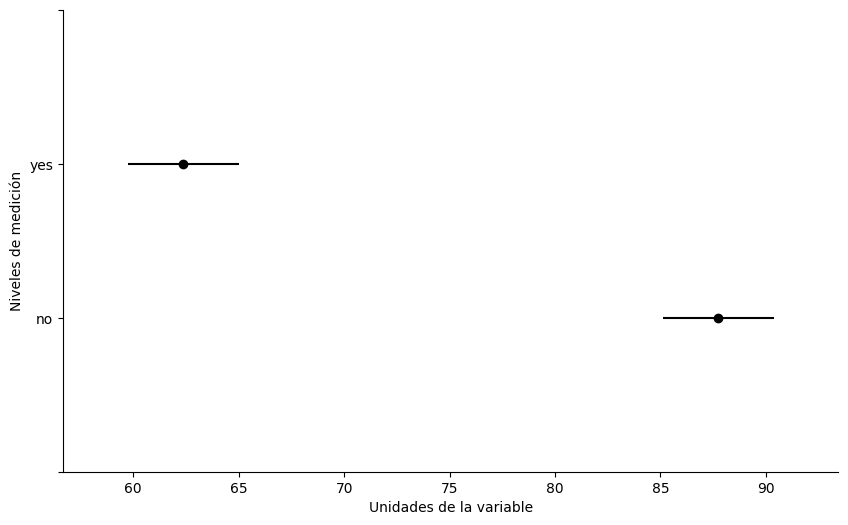

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['SCC'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'no' : 0, 'yes' : 1}
df['SCC'] = df['SCC'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


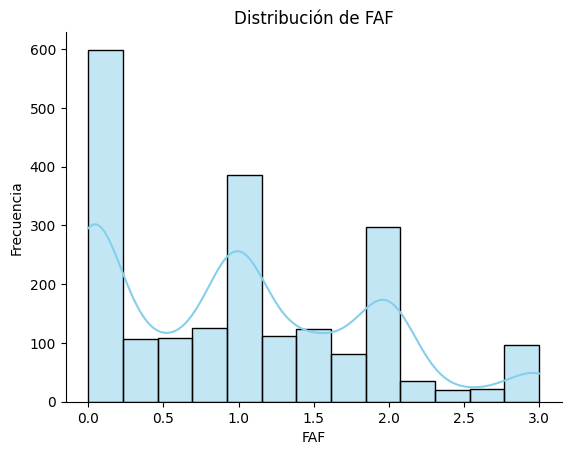

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['FAF'], kde = True, color = 'skyblue')

plt.xlabel('FAF')
plt.ylabel('Frecuencia')
plt.title('Distribución de FAF')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

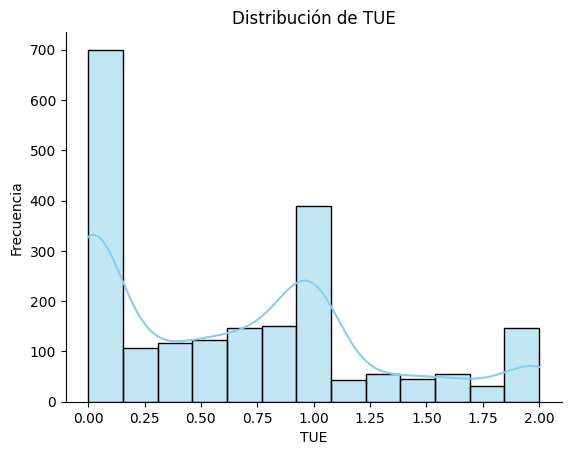

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['TUE'], kde = True, color = 'skyblue')

plt.xlabel('TUE')
plt.ylabel('Frecuencia')
plt.title('Distribución de TUE')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(CALC)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(CALC),3.0,9.870887e+04,32902.958062,51.402349,4.641371e-32
Residual,2107.0,1.348704e+06,640.106124,NaN,NaN


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
    Always Frequently   15.679 0.9272 -49.8332  81.1912  False
    Always  Sometimes  26.4252 0.7235 -38.6473  91.4976  False
    Always         no  11.6573 0.9676 -53.4428  76.7574  False
Frequently  Sometimes  10.7461  0.003   2.7794  18.7129   True
Frequently         no  -4.0218 0.5869 -12.2114   4.1679  False
 Sometimes         no -14.7679    0.0 -17.8731 -11.6627   True
--------------------------------------------------------------


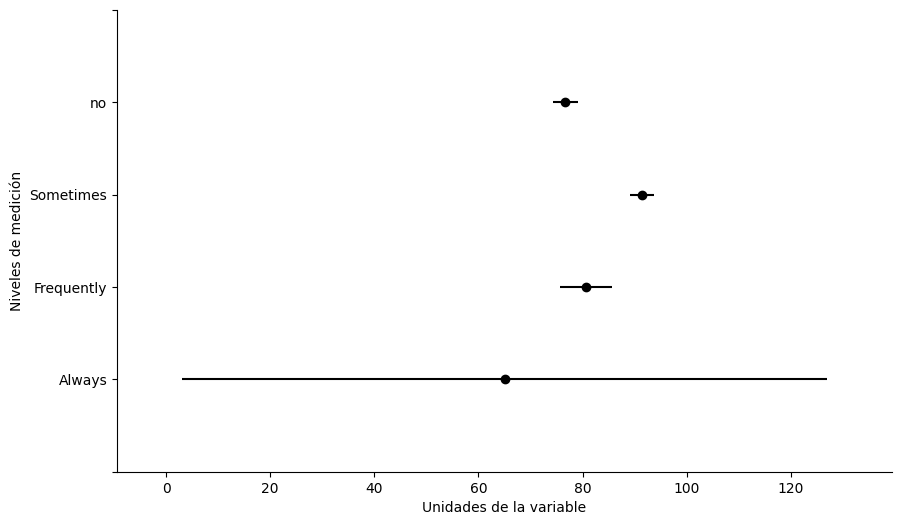

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['CALC'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Always' : 3, 'Frequently' : 2, 'Sometimes' : 1, 'no' : 0}
df['CALC'] = df['CALC'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,0,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,0,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,0,2.000000,0.000000,2,Walking,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,0,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,0,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,0,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,0,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,0,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(MTRANS)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(MTRANS),4.0,1.849548e+04,4623.869089,6.814859,0.000019
Residual,2106.0,1.428917e+06,678.498101,NaN,NaN


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------------
           Automobile                  Bike  -9.1933 0.8866 -36.2772 17.8906  False
           Automobile             Motorbike -12.8167 0.4894 -34.5151  8.8817  False
           Automobile Public_Transportation   1.5791 0.7845  -2.1981  5.3563  False
           Automobile               Walking -15.3115 0.0003   -25.38  -5.243   True
                 Bike             Motorbike  -3.6234 0.9985 -38.0069 30.7601  False
                 Bike Public_Transportation  10.7724 0.8109 -16.1659 37.7107  False
                 Bike               Walking  -6.1182 0.9772 -34.6275 22.3911  False
            Motorbike Public_Transportation  14.3958 0.3584  -7.1206 35.9122  False
            Motorbike               Walking  -2.4948 0.9984 -25.9482 20.9586

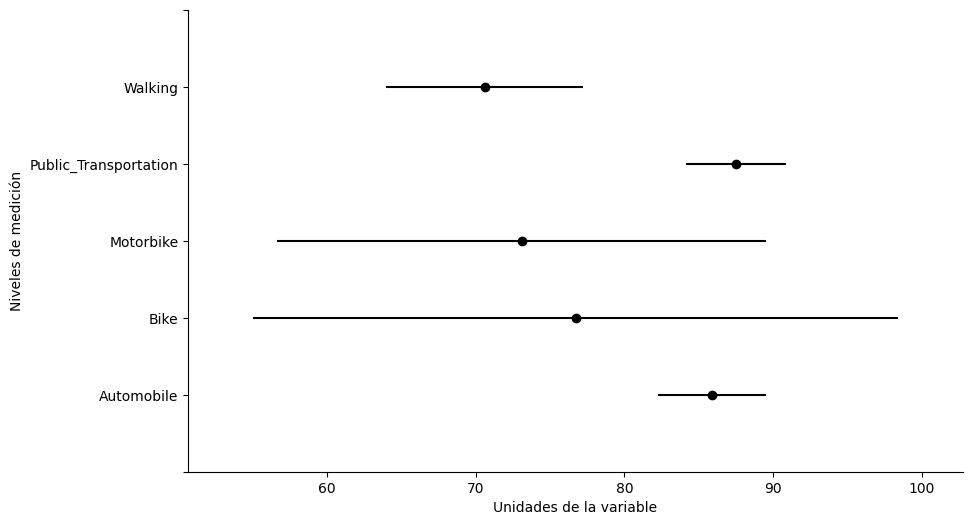

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['MTRANS'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Automobile' : 1, 'Bike' : 2, 'Motorbike' : 3, 'Public_Transportation' : 4, 'Walking' : 5}
df['MTRANS'] = df['MTRANS'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,0,0.000000,1.000000,0,4,Normal_Weight
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,1,4,Normal_Weight
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,0,2.000000,1.000000,2,4,Normal_Weight
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,0,2.000000,0.000000,2,5,Overweight_Level_I
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,0,0.000000,0.000000,1,4,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,0,1.676269,0.906247,1,4,Obesity_Type_III
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,0,1.341390,0.599270,1,4,Obesity_Type_III
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,0,1.414209,0.646288,1,4,Obesity_Type_III
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,0,1.139107,0.586035,1,4,Obesity_Type_III


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.ols('Weight ~ C(Obesity)', data= df).fit()
tabla_anova = sm.stats.anova_lm(modelo)   # ANOVA de una vía
tabla_anova

# H0: No hay diferencia entre grupos

,df,sum_sq,mean_sq,F,PR(>F)
C(Obesity),6.0,1.228371e+06,204728.517816,1966.518018,0.0
Residual,2104.0,2.190414e+05,104.107115,NaN,NaN


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------------
Insufficient_Weight       Normal_Weight  12.2487   0.0   9.7006  14.7968   True
Insufficient_Weight      Obesity_Type_I  42.9639   0.0  40.5314  45.3963   True
Insufficient_Weight     Obesity_Type_II   65.399   0.0  62.8718  67.9261   True
Insufficient_Weight    Obesity_Type_III  71.0348   0.0  68.5585  73.5111   True
Insufficient_Weight  Overweight_Level_I  24.3605   0.0  21.8188  26.9022   True
Insufficient_Weight Overweight_Level_II  32.1789   0.0  29.6373  34.7206   True
      Normal_Weight      Obesity_Type_I  30.7151   0.0  28.3188  33.1115   True
      Normal_Weight     Obesity_Type_II  53.1503   0.0  50.6578  55.6427   True
      Normal_Weight    Obesity_Type_III  58.7861   0.0  56.3452  61.2269   True
      Normal_Weight  Overweight_Level_I 

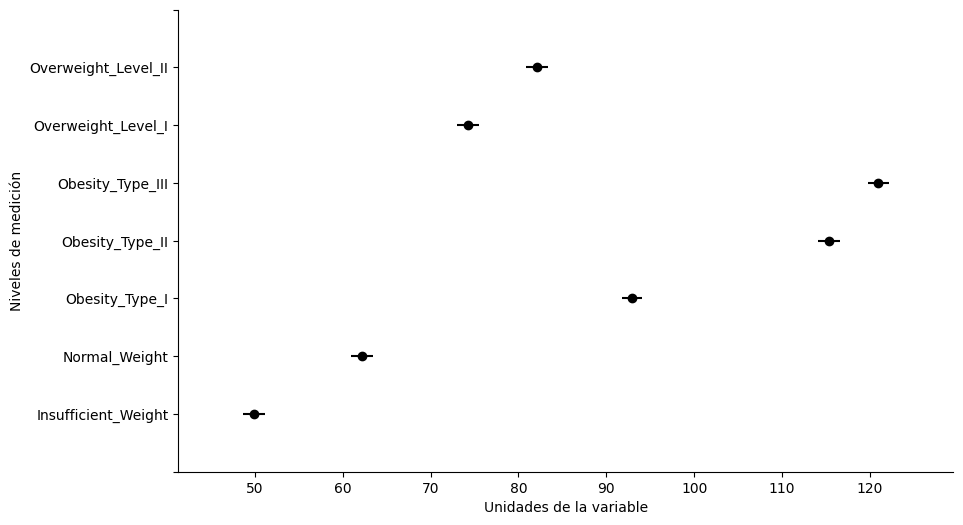

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05
tukey = pairwise_tukeyhsd(endog = df['Weight'], groups = df['Obesity'], alpha = nivel_de_significancia)

tukey.plot_simultaneous(ylabel = 'Niveles de medición', xlabel = 'Unidades de la variable')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('')
print(tukey)

In [ ]:
niveles = {'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Obesity_Type_I' : 2, 'Obesity_Type_II' : 3, 'Obesity_Type_III' : 4, 'Overweight_Level_I' : 5, 'Overweight_Level_II' : 6}
df['Obesity'] = df['Obesity'].map(niveles)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,2.000000,0,0.000000,1.000000,0,4,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,1,3.000000,0.000000,1,4,1
2,2,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,2.000000,0,2.000000,1.000000,2,4,1
3,2,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,2.000000,0,2.000000,0.000000,2,5,5
4,2,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,2.000000,0,0.000000,0.000000,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,1.728139,0,1.676269,0.906247,1,4,4
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2.005130,0,1.341390,0.599270,1,4,4
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2.054193,0,1.414209,0.646288,1,4,4
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2.852339,0,1.139107,0.586035,1,4,4


Text(0.5, 1.0, 'Matriz de correlacion')

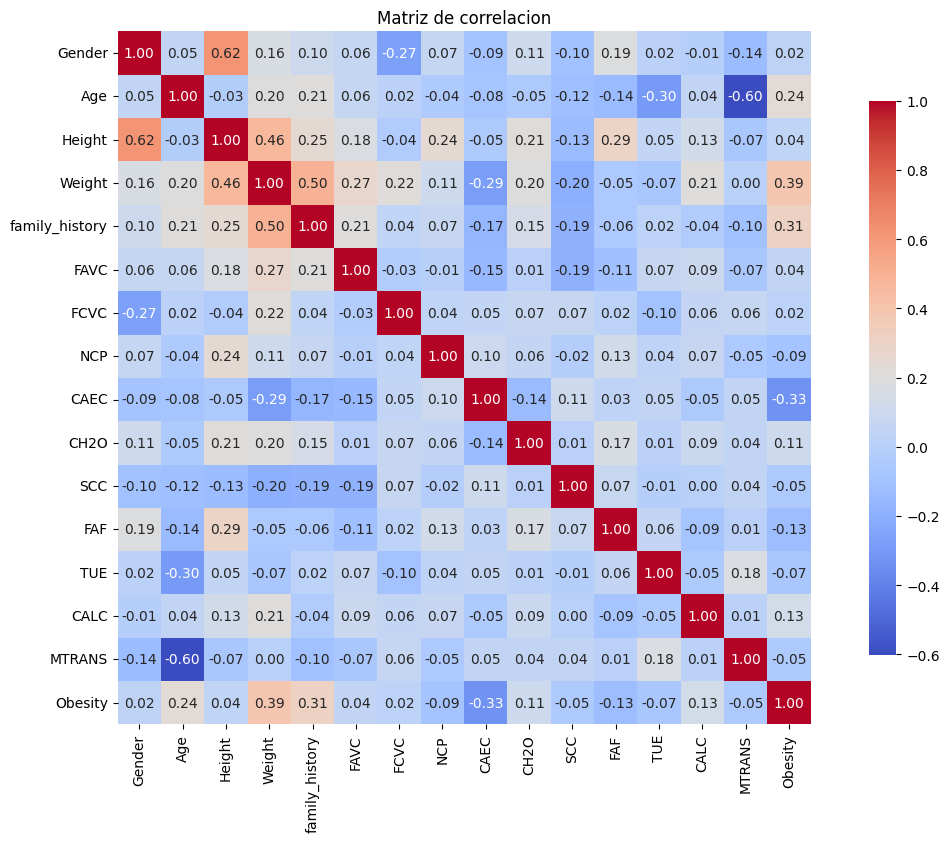

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize = (15, 9))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de correlacion')

Coeficiente de determinacion:  0.3848


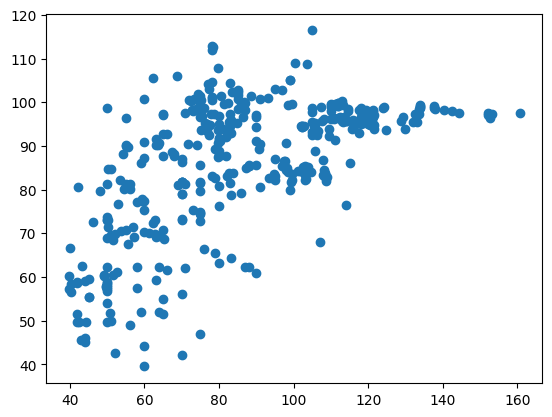

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = df[['Age', 'family_history', 'CAEC', 'CH2O', 'FAF', 'CALC', 'Obesity']]
Y = df['Weight']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinacion: {r2: 0.4f}')

In [ ]:
b0, b1, b2, b3, b4, b5, b6, b7 = modelo.params

Fun = lambda X1, X2, X3, X4, X5, X6, X7 : b0 + b1 * X1 + b2 * X2 + b3 * X3 + b4 * X4 + b5 * X5 + b6 * X6 + b7 * X7

Fun(25, 1, 1, 2, 2, 1, 4)

97.65654519982897

In [ ]:
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(modelo.resid, X_train_constante)
print(f'Valor-p de Breusch-Pagan: {valor_p_bp: 0.4f}')

Valor-p de Breusch-Pagan:  0.0000


In [ ]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = 'Weight ~  Age + family_history + CAEC + CH2O + FAF+ CALC + Obesity', data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)  # ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
Age,5685.806517,1.0,13.161344,2.925950e-04
family_history,199401.727373,1.0,461.569468,9.970230e-93
CAEC,24053.606199,1.0,55.678606,1.241865e-13
CH2O,10289.036300,1.0,23.816770,1.139189e-06
FAF,82.152786,1.0,0.190165,6.628241e-01
CALC,45916.866671,1.0,106.287062,2.397312e-24
Obesity,31707.499023,1.0,73.395620,2.018054e-17
Residual,908512.936959,2103.0,NaN,NaN


##**Conclusión**
Este conjunto de datos nos ofrece información valiosa sobre los niveles de obesidad en personas de México, Perú y Colombia, considerando factores como hábitos alimenticios, actividad física, edad y género, que pueden intervenir en el peso corporal.  

Con ayuda del modelo de regresión lineal múltiple, hemos concluido que existe una relación entre las variables y con ello podemos entender cómo cada uno de estos factores influye en el peso de las personas, lo que nos lleva a comprobar nuestra hipótesis inicial.

Los resultados obtenidos en este análisis demuestran que estos diversos factores tienen un impacto significativo en el peso de los individuos. Lo que es muy importante para tomar en cuenta ya que con este pronóstico nos será más facil poder encontrar soluciones para este problema que ha estado presente desde hace mucho tiempo y que ha afectado notabemente la vidad de las personas.



